In [2]:
import numpy as np

In [13]:


X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

In [11]:
import matplotlib.pyplot as plt

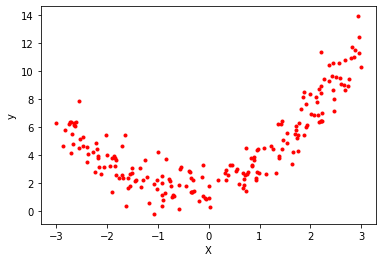

In [21]:


plt.plot(X,y,'r.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train.shape

(160, 1)

In [27]:
X_test.shape

(40, 1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model_pred=model.predict(X_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
print("r2 score :",r2_score(y_test,model_pred))

r2 score : 0.2560620503866301


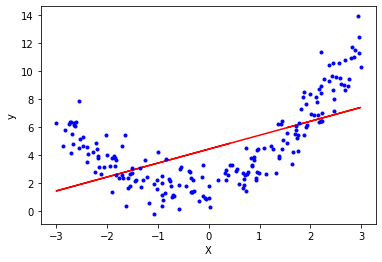

In [35]:
plt.plot(X_train,model.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [38]:
from sklearn.linear_model import SGDRegressor

In [40]:
# # Applying Polynomial Linear Regression
# # degree 2
# poly = PolynomialFeatures(degree=2,include_bias=True)

# X_train_trans = poly.fit_transform(X_train)
# X_test_trans = poly.transform(X_test)



# Applying polynomial linear regression

In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [62]:
poly=PolynomialFeatures(degree=55,include_bias=True)
X_train_trans=poly.fit_transform(X_train)


In [46]:
X_test_trans=poly.transform(X_test)

In [48]:
print(X_train[0])

[0.41437332]


In [49]:
print(X_train_trans[0])

[1.         0.41437332 0.17170525]


In [52]:
y_pred=model.predict(X_test_trans)

In [53]:
print("R2 score :",r2_score(y_test,y_pred))

R2 score : 0.8344391767384554


In [56]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=model.predict(X_new_poly)

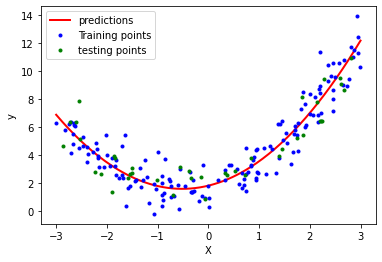

In [63]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='predictions')
plt.plot(X_train,y_train,'b.',label="Training points")
plt.plot(X_test,y_test,'g.',label="testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [96]:
from sklearn.pipeline import Pipeline

In [97]:


def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()



c:\users\hira\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\nanfunctions.py:1550: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
c:\users\hira\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


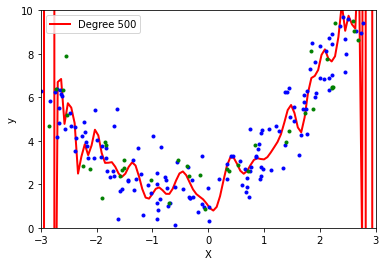

In [100]:
polynomial_regression(500)